#### demo1: Spatial distribution of TH, temperature and salinity clusters

In [1]:
import cartopy
import pandas as pd
from matplotlib import cm, colors, pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

###############################################################
# Plot a global map with the distribution of clusters by color
###############################################################
def plot_cluster_distribution(df, column, uniques):
    #############################################################
    # parameters:
    # 	df: pandas DataFrame of clusters
    # 	column: String: name of the column to plot
    # 	uniques: 1-D list, shape: [num_clusters]
 
    fig = plt.figure(figsize=(6.4, 4.8))
    ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
    land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale="10m", edgecolor='k')
    ax.add_feature(land, facecolor='lightgray', linewidth=0.25)

    cmap = cm.get_cmap('gist_rainbow_r', len(uniques))
    for k in range(len(uniques)):
        _df = df[df[column] == uniques[k]]
        ax.scatter(_df.longitude, _df.latitude, s=.05, edgecolors='none', color=cmap(k))

    axins = inset_axes(ax, width="100%", height="5%", loc='lower center', borderpad=-3)
    norm = colors.Normalize(vmin=0, vmax=len(uniques))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    fig.colorbar(sm, cax=axins, orientation="horizontal")
    return ax

The spatial distribution of TH, temperature and salinity clusters can be plotted through the files contained in the `cluster-location` folder.

Below is the code necessary to graph the temperature clusters obtained for _k_=5. This _k_ can vary from 2 to 50.

Text(0.5, 1.0, 'Conservative temperature clusters')

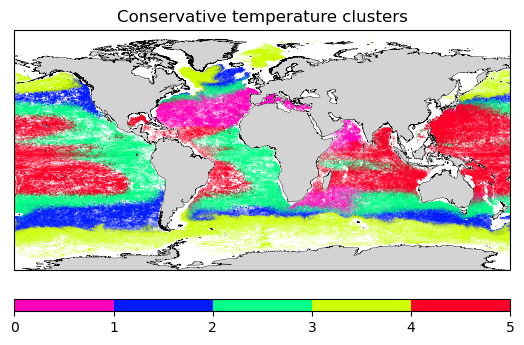

In [2]:
df = pd.read_csv('cluster-location/temperature-clusters.csv') # For temperature clusters
clusters = 5              # Number of centroids
column = f"{clusters}_t"  # For temperature clusters
uniques = df[column].unique()
ax = plot_cluster_distribution(df, column, uniques)
ax.set_title(r"Conservative temperature clusters")

To plot the salinity clusters, it is necessary to load the corresponding file and modify the column suffix.

Text(0.5, 1.0, 'Absoulute salinity clusters')

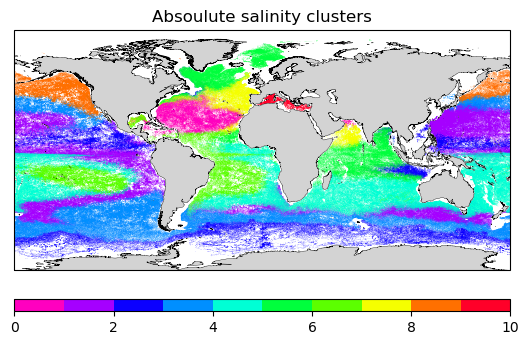

In [3]:
df = pd.read_csv('cluster-location/salinity-clusters.csv') # For salinity clusters
clusters = 10             # Number of centroids
column = f"{clusters}_s"  # For salinity clusters
uniques = df[column].unique()
ax = plot_cluster_distribution(df, column, uniques)
ax.set_title(r"Absoulute salinity clusters")

Finally, to plot the TH clusters, we can use the corresponding file and column.

Text(0.5, 1.0, 'Thermohaline clusters')

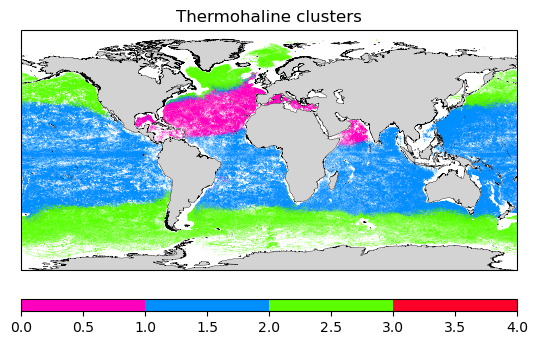

In [4]:
df = pd.read_csv('cluster-location/thermohaline-clusters.csv') # For TH clusters
clusters = 2              # Number of centroids of temperature and salinity
column = f"{clusters}_th" # For TH clusters
uniques = df[column].unique()
ax = plot_cluster_distribution(df, column, uniques)
ax.set_title(r"Thermohaline clusters")

Or do the combination of temperature and salinity clusters, as described in the manuscript. 

Cluster colors may vary due to the order in which the clusters are plotted. To create the `thermohaline-clusters.csv` file, the full path of each profiler in the Argo snapshot was used as an index. This column is not included in the csv file in an attempt to share only the data produced during the development of the manuscript.

Text(0.5, 1.0, 'Thermohaline clusters')

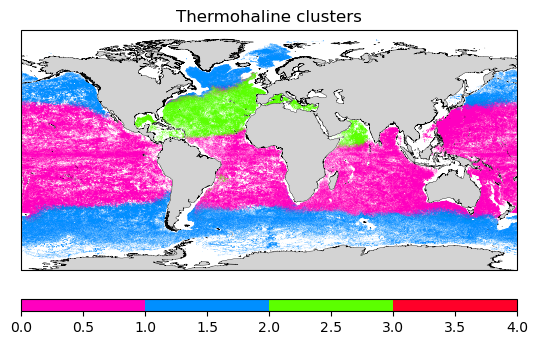

In [5]:
df_ct = pd.read_csv('cluster-location/temperature-clusters.csv')
df_ct = df_ct[["longitude","latitude","month","2_t"]]
df_ct = df_ct.set_index(["longitude","latitude","month"])

df_as = pd.read_csv('cluster-location/salinity-clusters.csv')
df_as = df_as[["longitude","latitude","month","2_s"]]
df_as = df_as.set_index(["longitude","latitude","month"])

df = df_ct.join(df_as).reset_index()
df["2_th"] = df["2_t"].astype(str) + "_" + df["2_s"].astype(str)
del df_ct, df_as

uniques = df["2_th"].unique()
ax = plot_cluster_distribution(df, "2_th", uniques)
ax.set_title(r"Thermohaline clusters")